In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

#algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from joblib import dump

In [26]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
px.scatter(df,x="Age",y="EstimatedSalary",color="Purchased",width=600,symbol="Purchased")

In [28]:
x,y=df.drop('Purchased',axis=1),df['Purchased']

In [29]:
num_cols=['Age','EstimatedSalary']
cat_cols=['Gender']

num_trans=Pipeline(steps=[
    ('scaler',MinMaxScaler()),
])

cat_trans=Pipeline(steps=[
    ("encoder",OrdinalEncoder())
])

preprocessor=ColumnTransformer(transformers=[
    ("num",num_trans,num_cols),
    ("cat",cat_trans,cat_cols)
])

model=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("selection",SelectKBest(chi2,k="all")),
    ("model",LogisticRegression())
])

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender'])])),
                ('selection',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x0000025AD3AC0CA0>)),
                ('model', LogisticRegression())])

In [32]:
ypred=model.predict(xtest)
# confusion matrix
cm=m.confusion_matrix(ytest,ypred)
report=m.classification_report(ytest,ypred)

<Axes: >

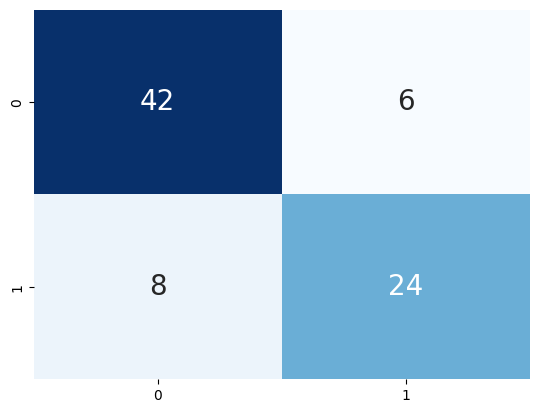

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False,annot_kws={'size':20})

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.80      0.75      0.77        32

    accuracy                           0.82        80
   macro avg       0.82      0.81      0.82        80
weighted avg       0.82      0.82      0.82        80



In [35]:
import plotly.graph_objects as go

In [36]:
dump(model,"purchased.jb")

['purchased.jb']